### 고윳값과 고유벡터

In [5]:
import numpy as np
from numpy.linalg import eig, inv

A = np.array([[4, 1],
              [0, 2]])

eigvals, P = eig(A)  # P: 고유벡터 행렬 = 정규화 되어서 나온다. 정규화 = 평균이 0, 분포가 1이 되도록 값 범위를 조정.
print("고유값 :", eigvals)
print("고유벡터 :", P)
D = np.diag(eigvals) # D: 고유값 대각행렬
print(D)
P_inv = inv(P)

# 유사행렬 관계 확인
Lambda = P_inv @ A @ P        # 이게 바로 A의 유사행렬 (대각화된 형태)
print("유사행렬 :", Lambda)

고유값 : [4. 2.]
고유벡터 : [[ 1.         -0.4472136 ]
 [ 0.          0.89442719]]
[[4. 0.]
 [0. 2.]]
유사행렬 : [[4. 0.]
 [0. 2.]]


### 벡터의 외적

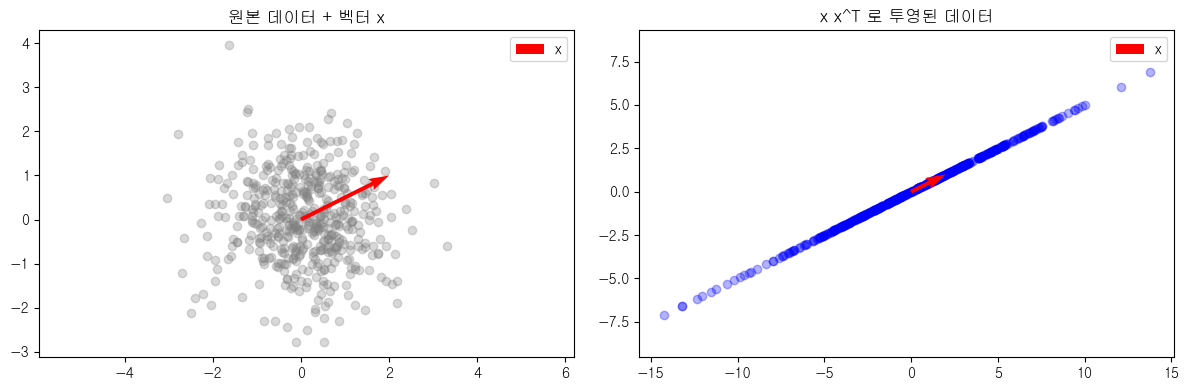

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\NGULIM.TTF'
font = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font)

# 랜덤한 2D 데이터 (표준 정규분포)
np.random.seed(1)
z = np.random.randn(500, 2)  # z ~ N(0, I)

# 특정 방향의 벡터 x
x = np.array([[2],
              [1]])

# 외적 행렬 x x^T (2x2)
A = x @ x.T  # rank-1, symmetric, PSD

# 외적 행렬을 적용해 데이터 변형
z_transformed = z @ A.T

# 시각화
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# 1. 원본 데이터 + 벡터 x
ax[0].scatter(z[:, 0], z[:, 1], alpha=0.3, color='gray')
ax[0].quiver(0, 0, x[0, 0], x[1, 0], angles='xy', scale_units='xy', scale=1, color='red', label='x')
ax[0].set_title("원본 데이터 + 벡터 x")
ax[0].axis('equal')
ax[0].legend()

# 2. 외적 행렬 x x^T 를 적용한 데이터
ax[1].scatter(z_transformed[:, 0], z_transformed[:, 1], alpha=0.3, color='blue')
ax[1].quiver(0, 0, x[0, 0], x[1, 0], angles='xy', scale_units='xy', scale=1, color='red', label='x')
ax[1].set_title("x x^T 로 투영된 데이터")
ax[1].axis('equal')
ax[1].legend()

plt.tight_layout()
plt.show()

### 행렬의 제곱근

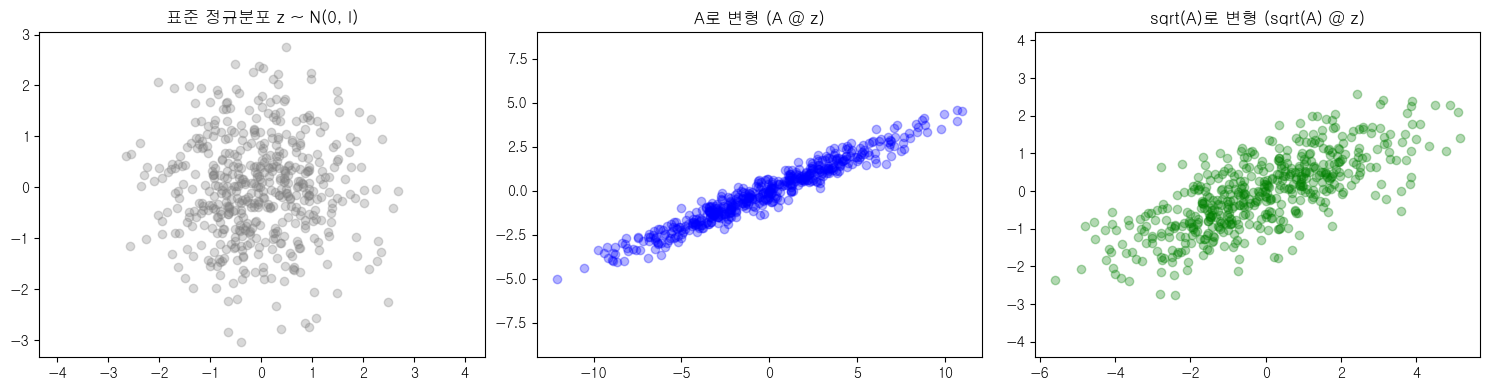

In [3]:
# 다시 실행: 필요한 라이브러리와 코드 초기화
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm

# 랜덤한 2D 표준 정규분포 데이터
np.random.seed(0)
z = np.random.randn(500, 2)  # z ~ N(0, I)

# 공분산 행렬 A (양의 정부호)
A = np.array([[4, 1.5],
              [1.5, 1]])

# A의 제곱근 행렬
A_sqrt = sqrtm(A)

# 원래 A로 변형한 데이터
x_full = z @ A.T

# 제곱근으로 변형한 데이터
x_sqrt = z @ A_sqrt.T

# 시각화
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# 1. 원본 z
ax[0].scatter(z[:, 0], z[:, 1], alpha=0.3, color='gray')
ax[0].set_title("표준 정규분포 z ~ N(0, I)")
ax[0].axis('equal')

# 2. A로 변형한 데이터
ax[1].scatter(x_full[:, 0], x_full[:, 1], alpha=0.3, color='blue')
ax[1].set_title("A로 변형 (A @ z)")
ax[1].axis('equal')

# 3. sqrt(A)로 변형한 데이터
ax[2].scatter(x_sqrt[:, 0], x_sqrt[:, 1], alpha=0.3, color='green')
ax[2].set_title("sqrt(A)로 변형 (sqrt(A) @ z)")
ax[2].axis('equal')

plt.tight_layout()
plt.show()


## 스펙트럴 클러스터링

C:\Users\rando\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


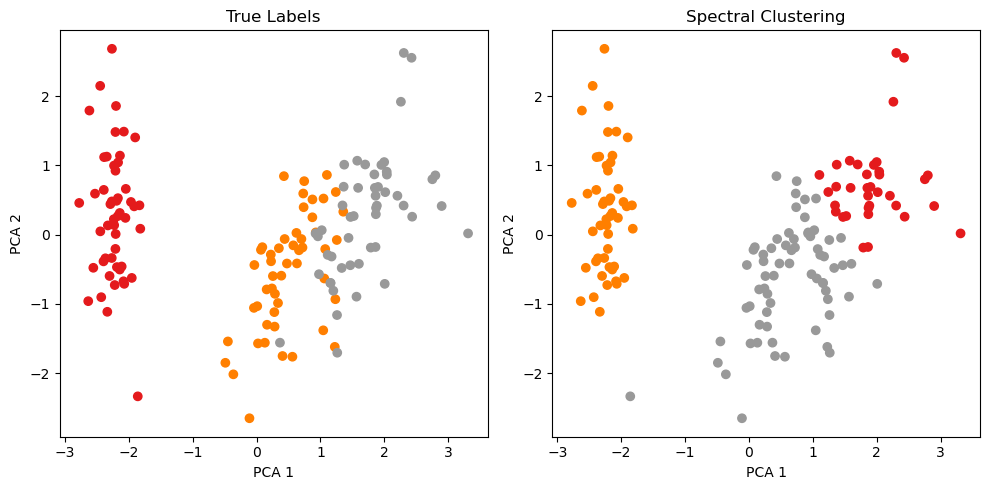

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. 데이터 불러오기
iris = load_iris()
X = iris.data
y = iris.target  # 실제 라벨 (평가용)

# 2. 스케일링 (선택적이지만 권장됨)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Spectral Clustering 적용
# =======================================================================================
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
clusters = spectral.fit_predict(X_scaled)
# =======================================================================================

# 4. 시각화를 위해 PCA로 2차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. 결과 시각화
plt.figure(figsize=(10, 5))

# 실제 라벨
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Set1')
plt.title("True Labels")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# 클러스터링 결과
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set1')
plt.title("Spectral Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.tight_layout()
plt.show()